# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as linregress
import seaborn

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"# YOUR CODE HERE
    # print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        # print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        # print(city_lat)
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = (city_weather['main']['temp_max'] - 273.15) # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE
        # print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kalaleh
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | almaznyy
Processing Record 14 of Set 1 | abha
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | bitung
Processing Record 17 of Set 1 | kimbe
Processing Record 18 of Set 1 | ahumada
City not found. Skipping...
Processing Record 19 of Set 1 | marsh harbour
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | linxia
Proce

City not found. Skipping...
Processing Record 38 of Set 4 | college station
Processing Record 39 of Set 4 | mbandaka
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | drayton valley
Processing Record 43 of Set 4 | kushima
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | cuamba
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | poum
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | zhezkazgan
Processing Record 0 of Set 5 | karmana
City not found. Skipping...
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | katobu
Processing Record 3 of Set 5 | huilong
Processing Record 4 of Set 5 | simbahan
Processing Record 5 of Set 5 | hurghada
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | solnechnyy
Processing Record 8 of Set 5 | mhango
Processing Record 9 of Set 5 | broome
Processin

Processing Record 26 of Set 8 | passos
Processing Record 27 of Set 8 | kavaratti
Processing Record 28 of Set 8 | fairbanks
Processing Record 29 of Set 8 | amderma
City not found. Skipping...
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | birin
Processing Record 32 of Set 8 | quelimane
Processing Record 33 of Set 8 | zambezi
Processing Record 34 of Set 8 | barroualie
City not found. Skipping...
Processing Record 35 of Set 8 | tres arroyos
Processing Record 36 of Set 8 | makhachkala
Processing Record 37 of Set 8 | evensk
Processing Record 38 of Set 8 | nguiu
City not found. Skipping...
Processing Record 39 of Set 8 | los llanos de aridane
Processing Record 40 of Set 8 | nikel
Processing Record 41 of Set 8 | namatanai
Processing Record 42 of Set 8 | gazanjyk
Processing Record 43 of Set 8 | guadix
Processing Record 44 of Set 8 | ayagoz
Processing Record 45 of Set 8 | kinkala
Processing Record 46 of Set 8 | kloulklubed
Processing Record 47 of Set 8 | oxelosund
Proces

Processing Record 14 of Set 12 | grenaa
Processing Record 15 of Set 12 | shemordan
Processing Record 16 of Set 12 | havre-saint-pierre
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | simao
Processing Record 19 of Set 12 | stornoway
Processing Record 20 of Set 12 | luderitz
Processing Record 21 of Set 12 | balykshi
Processing Record 22 of Set 12 | maarianhamina
Processing Record 23 of Set 12 | tanquian
City not found. Skipping...
Processing Record 24 of Set 12 | port moresby
Processing Record 25 of Set 12 | borovoy
Processing Record 26 of Set 12 | college
Processing Record 27 of Set 12 | banda aceh
Processing Record 28 of Set 12 | biloela
Processing Record 29 of Set 12 | tupik
Processing Record 30 of Set 12 | boende
Processing Record 31 of Set 12 | sao felix do xingu
Processing Record 32 of Set 12 | dabat
Processing Record 33 of Set 12 | sokoni
Processing Record 34 of Set 12 | klaksvik
Processing Record 35 of Set 12 | zaysan
Processing Record 36 of Set 12

In [6]:
# Convert the cities weather data into a Pandas DataFrame
# testcelcius = (city_data_df['Max Temp'][0] - 273.15)
# print(testcelcius)

city_data_df = pd.DataFrame(city_data, columns = ['City', 'Lat', 'Lng',
                                                  'Max Temp', 'Humidity', 
                                                  'Cloudiness', 'Wind Speed', 
                                                  'Country', 'Date'])

# Show Record Count

print(len(city_data_df))
city_data_df.count()

578


City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,-20.3428,57.7575,24.01,90,100,2.74,MU,1674576660
1,port alfred,-33.5906,26.8910,20.66,84,65,2.24,ZA,1674576661
2,rikitea,-23.1203,-134.9692,26.02,70,22,8.21,PF,1674576661
3,bluff,-46.6000,168.3333,9.71,86,16,2.00,NZ,1674576662
4,cape town,-33.9258,18.4232,21.73,53,37,4.02,ZA,1674576663


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/citiess.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/citiess.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bambous virieux,-20.3428,57.7575,24.01,90,100,2.74,MU,1674576660
1,port alfred,-33.5906,26.8910,20.66,84,65,2.24,ZA,1674576661
2,rikitea,-23.1203,-134.9692,26.02,70,22,8.21,PF,1674576661
3,bluff,-46.6000,168.3333,9.71,86,16,2.00,NZ,1674576662
4,cape town,-33.9258,18.4232,21.73,53,37,4.02,ZA,1674576663


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

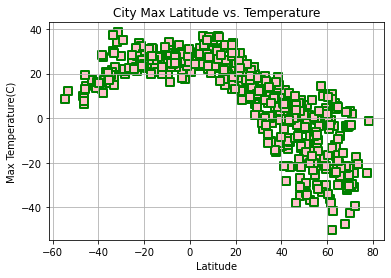

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x1 = city_data_df["Lat"]
y1 = city_data_df["Max Temp"]

plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title('City Max Latitude vs. Temperature') #,format(city_data_df["Date"].iloc[0].split(",")[0]))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

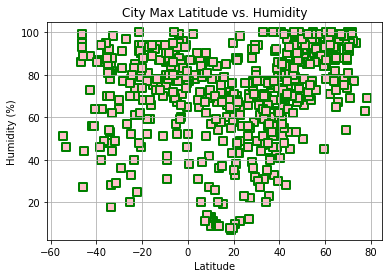

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x1 = city_data_df["Lat"]
y1 = city_data_df["Humidity"]

plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Max Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

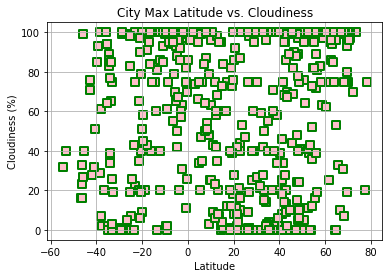

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x1 = city_data_df["Lat"]
y1 = city_data_df["Cloudiness"]

plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Max Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig13.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

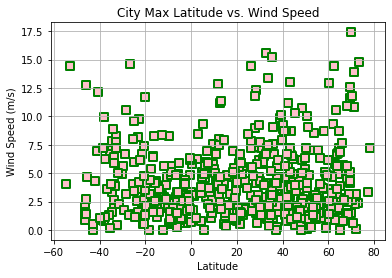

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x1 = city_data_df["Lat"]
y1 = city_data_df["Wind Speed"]

plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title('City Max Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig14.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The correlation between both factors is -0.76
y = -0.44x + 18.43


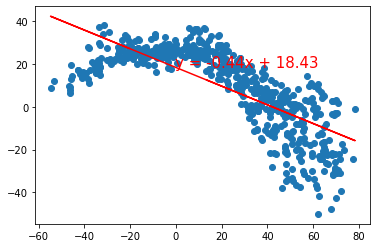

In [50]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def get_correlation_regression(x,y):
    correlation = linregress.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(slope,intercept),fontsize=15,color="red")   
# test display the line equation in the plot

get_correlation_regression(city_data_df["Lat"], city_data_df["Max Temp"])
     

# x1 = city_data_df["Lat"]
# y1 = city_data_df["Max Temp"]
# plt.scatter(x1,y1)

# # use the correlation formula to find correlation on both
# correlation = linregress.pearsonr(x1,y1)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

# # use the regression and lineregression formula imported from spicy.stats dependencies above)
# (slope, intercept, rvalue, pvalue, stderr) = linregress.linregress(x1, y1)
# regress_values = x1 * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

# plt.plot(x1,regress_values,"r-")
# # display the line equation in the plot
# plt.annotate(line_eq,(19,41),fontsize=15,color="red")


In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])
# northern_hemi_df.reset_index(inplace = True, drop = True)
# northern_hemi_df

# Display sample data
print(len(northern_hemi_df))
northern_hemi_df

398


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,kapaa,22.0752,-159.3190,19.99,88,20,4.12,US,1674576664
7,kalaleh,37.3807,55.4916,4.05,56,71,0.23,IR,1674576665
8,albany,42.6001,-73.9662,1.87,74,95,0.89,US,1674576666
9,barrow,71.2906,-156.7887,-21.99,77,100,10.80,US,1674576666
10,almaznyy,48.0448,40.0450,-2.26,67,5,4.90,RU,1674576667
...,...,...,...,...,...,...,...,...,...
572,pran buri,12.3847,99.9098,26.68,59,42,4.70,TH,1674576989
573,gravdal,68.1214,13.5031,2.94,75,75,5.66,NO,1674576990
574,domodossola,46.1165,8.2931,10.01,62,82,1.11,IT,1674576990


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])
# southern_hemi_df.reset_index(inplace = True, drop = True)
# southern_hemi_df

# Display sample data
print(len(southern_hemi_df))
southern_hemi_df.head()

180


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bambous virieux,-20.3428,57.7575,24.01,90,100,2.74,MU,1674576660
1,port alfred,-33.5906,26.8910,20.66,84,65,2.24,ZA,1674576661
2,rikitea,-23.1203,-134.9692,26.02,70,22,8.21,PF,1674576661
3,bluff,-46.6000,168.3333,9.71,86,16,2.00,NZ,1674576662
4,cape town,-33.9258,18.4232,21.73,53,37,4.02,ZA,1674576663


###  Temperature vs. Latitude Linear Regression Plot

The correlation between both factors is -0.82
y = -0.8x + 33.92


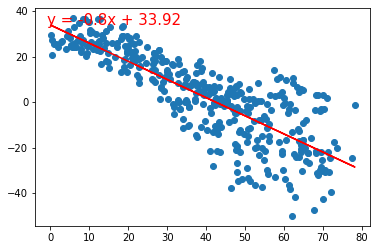

In [53]:
##### Linear regression on Northern Hemisphere
# YOUR CODE HERE

# plt.annotate(line_eq,(5,-35),fontsize=15,color="red")
get_correlation_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])


# x1nh = northern_hemi_df["Lat"]
# y1nh = northern_hemi_df["Max Temp"]
# plt.scatter(x1nh,y1nh)

# # use the correlation formula to find correlation on both
# correlation = linregress.pearsonr(x1nh,y1nh)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

# # use the regression and lineregression formula imported from spicy.stats dependencies above)
# (slope, intercept, rvalue, pvalue, stderr) = linregress.linregress(x1nh, y1nh)
# regress_values = x1nh * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

# plt.plot(x1nh,regress_values,"r-")
# # display the line equation in the plot
# plt.annotate(line_eq,(5,-35),fontsize=15,color="red")


The correlation between both factors is 0.56
y = 0.23x + 28.43


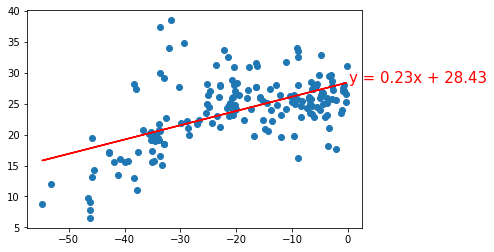

In [54]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

# plt.annotate(line_eq,(-35,10),fontsize=15,color="red")
get_correlation_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])


# x1sh = southern_hemi_df["Lat"]
# y1sh = southern_hemi_df["Max Temp"]
# plt.scatter(x1sh,y1sh)

# # use the correlation formula to find correlation on both
# correlation = linregress.pearsonr(x1sh,y1sh)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

# # use the regression and lineregression formula imported from spicy.stats dependencies above)
# (slope, intercept, rvalue, pvalue, stderr) = linregress.linregress(x1sh, y1sh)
# regress_values = x1sh * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

# plt.plot(x1sh,regress_values,"r-")
# # display the line equation in the plot
# plt.annotate(line_eq,(-45,6),fontsize=15,color="red")


**Discussion about the linear relationship:** Based on Random cities generated data, The Max Temperature vs. Latitude scatter plot for cities in the northern and southern hemisphere are listed above. It appears that max temperature show a strong negative linear relationship with latitudes in the northern hemisphere with -0.82 correlation for northern hemisphere, and positive linear relationship with latitudes in the southern hemisphere with 0.56 correlation

### Humidity vs. Latitude Linear Regression Plot

The correlation between both factors is 0.52
y = 0.62x + 47.52


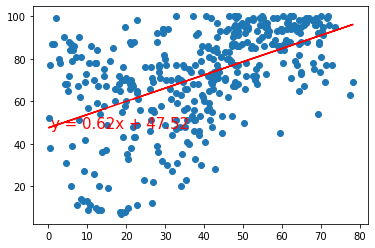

In [55]:
# Northern Hemisphere
# YOUR CODE HERE

# plt.annotate(line_eq,(45,30),fontsize=15,color="red")
get_correlation_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])


The correlation between both factors is 0.22
y = 0.3x + 80.28


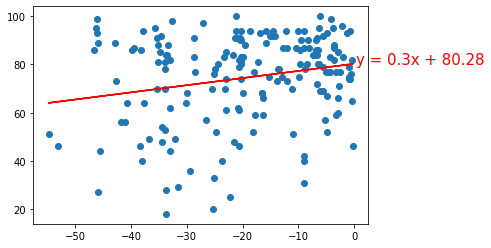

In [56]:
# Southern Hemisphere
# YOUR CODE HERE

# plt.annotate(line_eq,(-20,26),fontsize=15,color="red")
get_correlation_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** Based on Random cities generated data, The Humidity vs. Latitude scatter plot for cities in the northern and southern hemisphere are listed above. It appears that Humidity show somewhat positive linear relationship with latitudes in the northern hemisphere with 0.52 correlation for northern hemisphere, and minimal positive linear relationship with latitudes in the southern hemisphere with 0.22 correlation

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between both factors is 0.26
y = 0.54x + 36.02


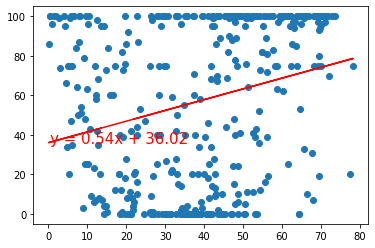

In [57]:
# Northern Hemisphere
# YOUR CODE HERE

# plt.annotate(line_eq,(45,30),fontsize=15,color="red")
get_correlation_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The correlation between both factors is 0.4
y = 1.08x + 85.92


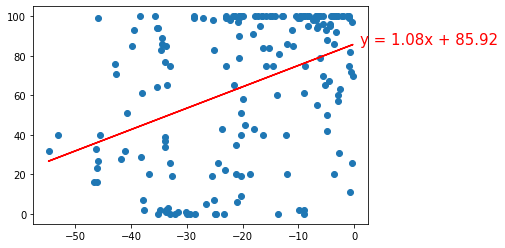

In [58]:
# Southern Hemisphere
# YOUR CODE HERE

# plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
get_correlation_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** Based on Random cities generated data, The Cloudiness vs. Latitude scatter plot for cities in the northern and southern hemisphere are listed above. It appears that Cloudiness show little positive linear relationship with latitudes in the northern hemisphere with 0.26 correlation for northern hemisphere, and somewhat similar positive linear relationship with latitudes in the southern hemisphere with 0.4 correlation

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between both factors is 0.01
y = 0.0x + 4.14


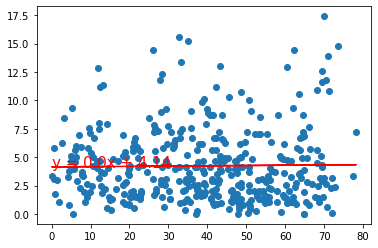

In [59]:
# Northern Hemisphere
# YOUR CODE HERE

# plt.annotate(line_eq,(5,15),fontsize=15,color="red")
get_correlation_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The correlation between both factors is -0.3
y = -0.06x + 2.41


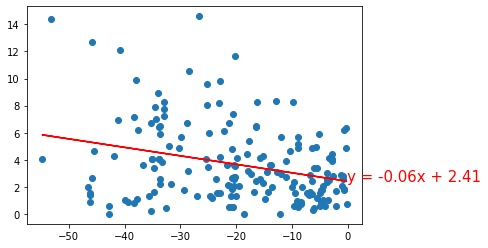

In [60]:
# Southern Hemisphere
# YOUR CODE HERE

# plt.annotate(line_eq,(-23,12),fontsize=15,color="red")
get_correlation_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Based on Random cities generated data, The Wind Speed vs. Latitude scatter plot for cities in the northern and southern hemisphere are listed above. It appears that Wind Speed show no linear relationship with latitudes in the northern hemisphere with 0.01 correlation for northern hemisphere, and somewhat little negative linear relationship with latitudes in the southern hemisphere with -0.3 correlation